## Project 6 - Hospitality App New User Bookings

### Objective

1. You need to do basic feature engineering, data preprocessing, modelling and model tuning work in this homework.

2. Please **focus more on feature extractions**. In this project, there are a lot of interesting features, how to fully utilize them is the key to get a good model.


### Hints
1. Data Exploration
2. Data Processing
3. Feature Engineering
4. Model Building

In [1]:
## import necessary packages
import numpy as np
import pandas as pd
import time
import random
import datetime
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.style.use('ggplot')

In [4]:
## Type your answers here ##
df = pd.read_csv('./Project 6 - Hospitality New User Booking Data/train_users_2.csv')

In [5]:
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010/6/28,2.009030e+13,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011/5/25,2.009050e+13,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010/9/28,2.009060e+13,2010/8/2,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011/12/5,2.009100e+13,2012/9/8,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010/9/14,2.009120e+13,2010/2/18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  float64
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [7]:
numerical_df = df.select_dtypes(['float64','int64'])

In [8]:
numerical_df.corr()

,timestamp_first_active,age,signup_flow
timestamp_first_active,1.000000,-0.035960,0.196689
age,-0.035960,1.000000,-0.018609
signup_flow,0.196689,-0.018609,1.000000


<AxesSubplot:>

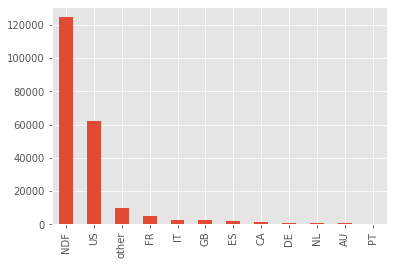

In [10]:
df['country_destination'].value_counts().plot.bar()

<AxesSubplot:>

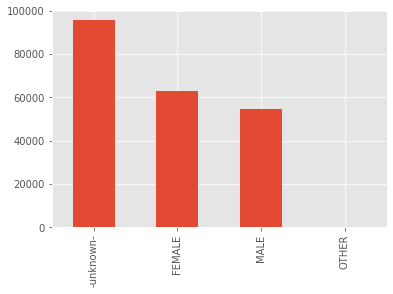

In [11]:
df['gender'].value_counts().plot.bar()

<AxesSubplot:>

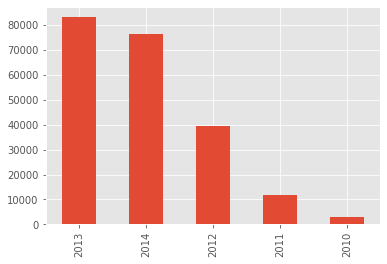

In [12]:
pd.to_datetime(df['date_account_created']).dt.year.value_counts().plot.bar()

<AxesSubplot:ylabel='Frequency'>

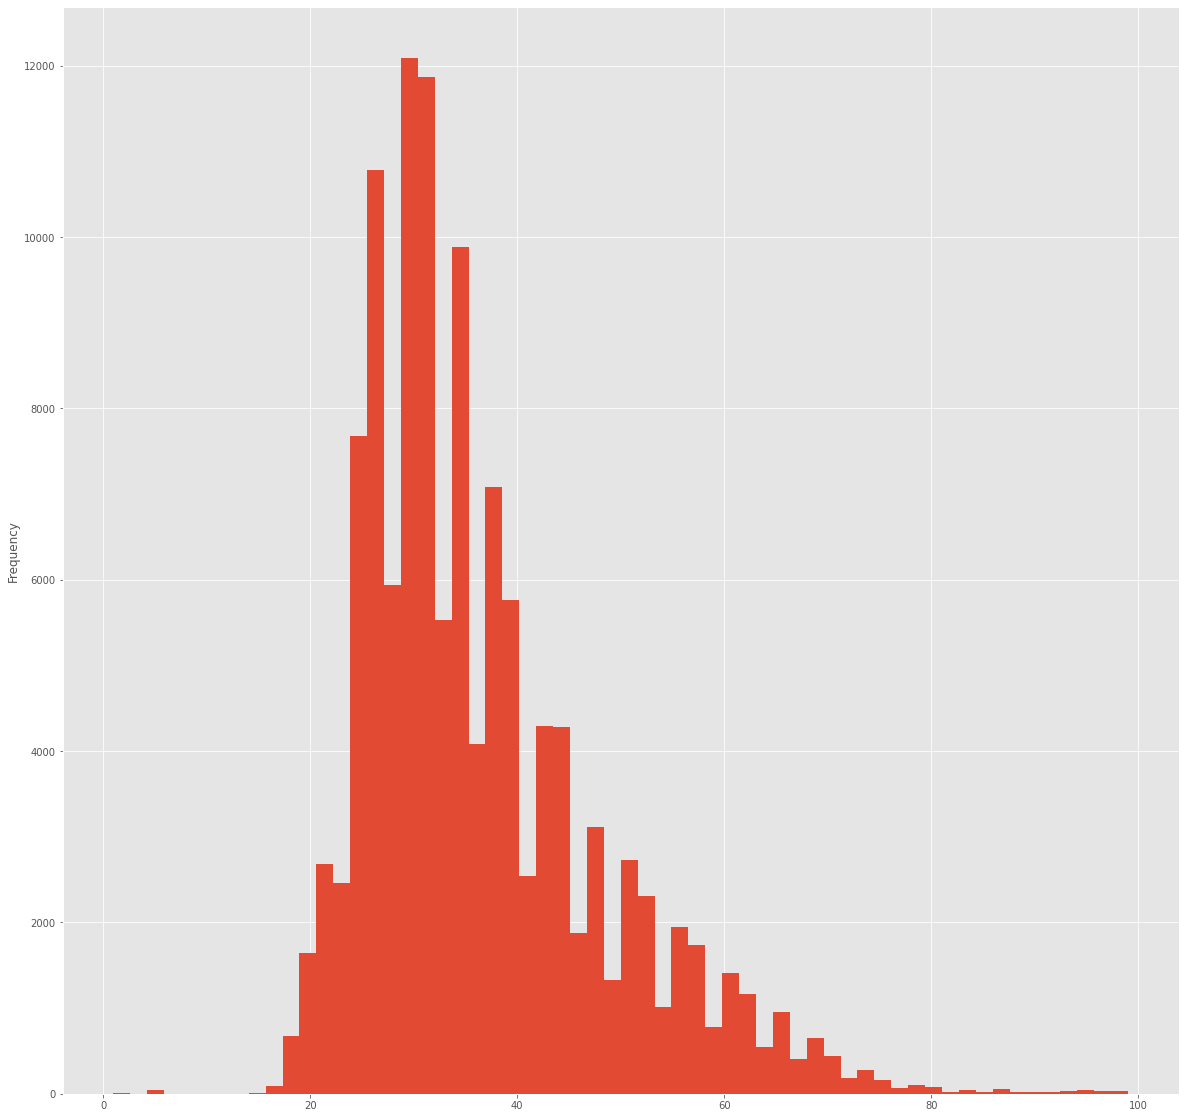

In [19]:
plt.figure(figsize=[20,20])
df[df['age']<100]['age'].plot.hist(bins=60)

Text(0.5, 1.0, 'Gender-Age Distribution')

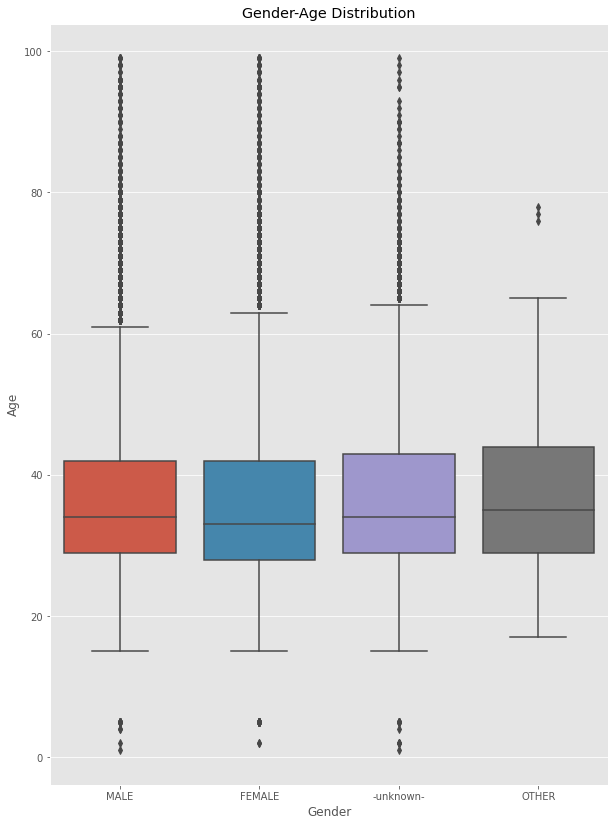

In [24]:
import seaborn as sns
plt.figure(figsize=[10,14])
sns.boxplot(x='gender',
    y='age',
    data=df[df['age']<100])
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Gender-Age Distribution')

Text(0.5, 1.0, 'Gender-Destination Distribution')

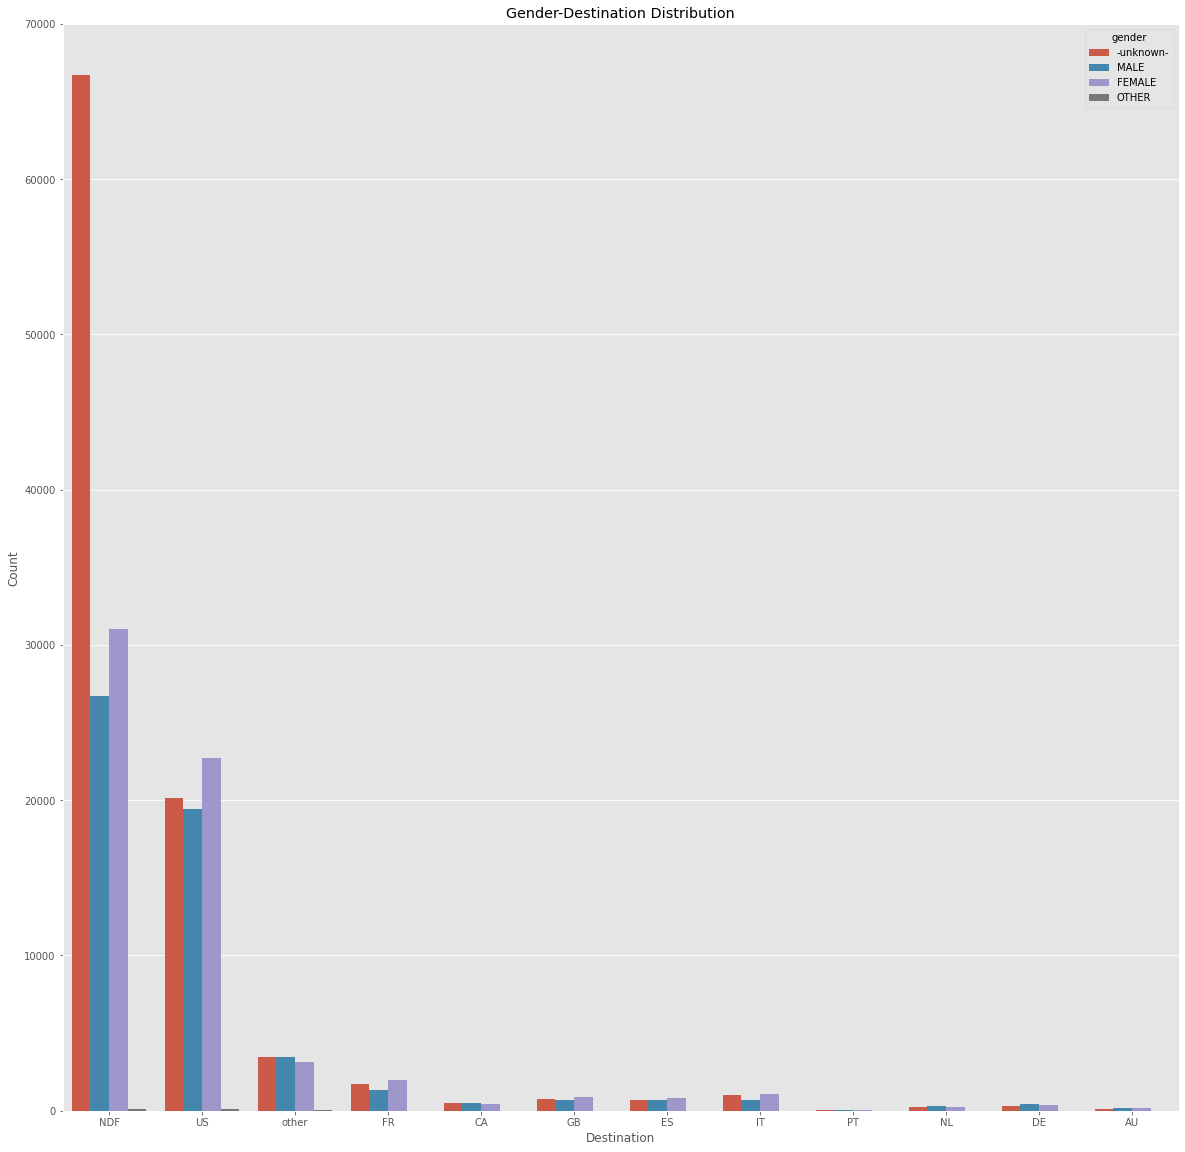

In [30]:
plt.figure(figsize=[20,20])
sns.countplot(x='country_destination',
    hue='gender',
    data=df)
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Gender-Destination Distribution')

In [31]:
labels = df['country_destination'].values

In [32]:
labels

array(['NDF', 'NDF', 'US', ..., 'NDF', 'NDF', 'NDF'], dtype=object)

In [34]:
training = df.drop(['id','date_first_booking','country_destination'], axis=1)

In [35]:
training

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,2010/6/28,2.009030e+13,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,2011/5/25,2.009050e+13,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,2010/9/28,2.009060e+13,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,2011/12/5,2.009100e+13,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,2010/9/14,2.009120e+13,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,2014/6/30,2.014060e+13,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari
213447,2014/6/30,2.014060e+13,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
213448,2014/6/30,2.014060e+13,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
213449,2014/6/30,2.014060e+13,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari


In [39]:
date = pd.to_datetime(training['date_account_created'])
training['year'] = date.dt.year

In [40]:
training['month'] = date.dt.month

In [55]:
training['weekday'] = date.dt.weekday

In [56]:
training

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,year,month,day,weekday
0,2010/6/28,2.009030e+13,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,6,28,0
1,2011/5/25,2.009050e+13,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,2011,5,25,2
2,2010/9/28,2.009060e+13,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,2010,9,28,1
3,2011/12/5,2.009100e+13,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2011,12,5,0
4,2010/9/14,2.009120e+13,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,9,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,2014/6/30,2.014060e+13,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,2014,6,30,0
213447,2014/6/30,2.014060e+13,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,2014,6,30,0
213448,2014/6/30,2.014060e+13,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2014,6,30,0
213449,2014/6/30,2.014060e+13,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,2014,6,30,0


In [57]:
training['weekday'].value_counts()

1    35085
2    34087
0    32862
3    32570
4    29741
6    24568
5    24538
Name: weekday, dtype: int64

In [62]:
def get_seasons(date):
    month = date.month
    if month in [3,4,5]:
        return 'Spring'    
    elif month in [6,7,8]:
        return 'Summer'    
    elif month in [9,10,11]:
        return 'Fall'   
    else:
        return 'Winter' 

In [63]:
training['seasons'] = np.array([get_seasons(x) for x in date])

In [64]:
training.head()

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,year,month,day,weekday,seasons
0,2010/6/28,2.009030e+13,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,6,28,0,Summer
1,2011/5/25,2.009050e+13,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,2011,5,25,2,Spring
2,2010/9/28,2.009060e+13,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,2010,9,28,1,Fall
3,2011/12/5,2.009100e+13,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2011,12,5,0,Winter
4,2010/9/14,2.009120e+13,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,9,14,1,Fall


In [72]:
tfa = df.timestamp_first_active.astype(str)

In [73]:
tfa

0         20090300000000.0
1         20090500000000.0
2         20090600000000.0
3         20091000000000.0
4         20091200000000.0
                ...       
213446    20140600000000.0
213447    20140600000000.0
213448    20140600000000.0
213449    20140600000000.0
213450    20140600000000.0
Name: timestamp_first_active, Length: 213451, dtype: object

In [85]:
training['tfa_year'] = tfa.apply(lambda x: x[:4]).astype(int)

In [88]:
training

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,...,first_device_type,first_browser,year,month,day,weekday,seasons,tfa_year,tfa_month,tfa_day
0,2010/6/28,2.009030e+13,-unknown-,NaN,facebook,0,en,direct,direct,untracked,...,Mac Desktop,Chrome,2010,6,28,0,Summer,2009,3,0
1,2011/5/25,2.009050e+13,MALE,38.0,facebook,0,en,seo,google,untracked,...,Mac Desktop,Chrome,2011,5,25,2,Spring,2009,5,0
2,2010/9/28,2.009060e+13,FEMALE,56.0,basic,3,en,direct,direct,untracked,...,Windows Desktop,IE,2010,9,28,1,Fall,2009,6,0
3,2011/12/5,2.009100e+13,FEMALE,42.0,facebook,0,en,direct,direct,untracked,...,Mac Desktop,Firefox,2011,12,5,0,Winter,2009,10,0
4,2010/9/14,2.009120e+13,-unknown-,41.0,basic,0,en,direct,direct,untracked,...,Mac Desktop,Chrome,2010,9,14,1,Fall,2009,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,2014/6/30,2.014060e+13,MALE,32.0,basic,0,en,sem-brand,google,omg,...,Mac Desktop,Safari,2014,6,30,0,Summer,2014,6,0
213447,2014/6/30,2.014060e+13,-unknown-,NaN,basic,0,en,direct,direct,linked,...,Windows Desktop,Chrome,2014,6,30,0,Summer,2014,6,0
213448,2014/6/30,2.014060e+13,-unknown-,32.0,basic,0,en,direct,direct,untracked,...,Mac Desktop,Firefox,2014,6,30,0,Summer,2014,6,0
213449,2014/6/30,2.014060e+13,-unknown-,NaN,basic,25,en,other,other,tracked-other,...,iPhone,Mobile Safari,2014,6,30,0,Summer,2014,6,0


In [87]:
training['tfa_month'] = tfa.apply(lambda x: x[4:6]).astype(int)
training['tfa_day'] = tfa.apply(lambda x: x[6:8]).astype(int)